In [1]:
!pip install pixiedust

In [3]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [2]:
import numpy as np
import pandas as pd

In [3]:
file = r'./data/LearningStyles.csv'

In [4]:
df = pd.read_csv(file, sep=',', encoding='gbk')

In [5]:
print(df)

      GRADO GRUPO  \
0         1     G   
1         1     D   
2         1     A   
3         1     B   
4         1     F   
...     ...   ...   
1017      3     K   
1018      3     K   
1019      3     K   
1020      3     J   
1021      3     L   

      Me ayuda trazar o escribir a mano las palabras cuando tengo que aprenderlas de\nmemoria.\n1 = Nunca\n2 = Raramente\n3 = Ocasionalmente\n4 = Usualmente\n5 = Siempre  \
0                                                     1                                                                                                                     
1                                                     5                                                                                                                     
2                                                     3                                                                                                                     
3                                                     1

In [ ]:
display(df)


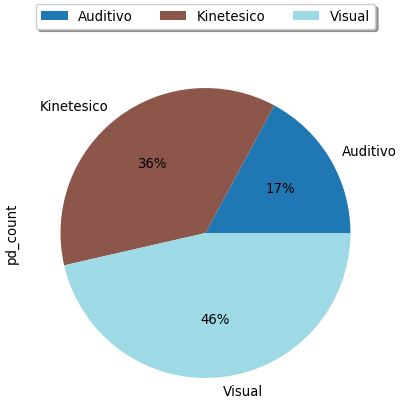

In [7]:
display(df)


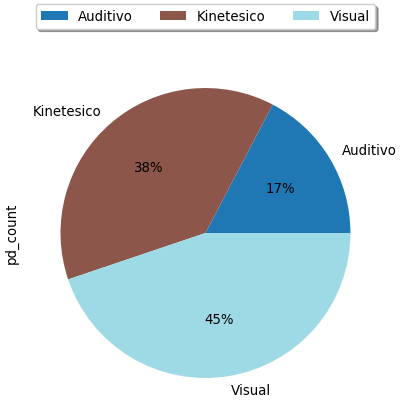

In [9]:
display(df)

In [ ]:
display(df)

In [11]:
display(df)